In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

transactions_month_6 = pd.read_csv('/content/drive/My Drive/transactions_month_6.csv')
transactions_month_7 = pd.read_csv('/content/drive/My Drive/transactions_month_7.csv')
transactions_month_8 = pd.read_csv('/content/drive/My Drive/transactions_month_8.csv')
transactions_month_9 = pd.read_csv('/content/drive/My Drive/transactions_month_9.csv')
transactions_month_10 = pd.read_csv('/content/drive/My Drive/transactions_month_10.csv')
transactions_month_11 = pd.read_csv('/content/drive/My Drive/transactions_month_11.csv')
transactions_month_12 = pd.read_csv('/content/drive/My Drive/transactions_month_12.csv')
fraud = pd.read_csv('/content/drive/My Drive/fraud.csv')


In [9]:
all_transactions = [transactions_month_6, transactions_month_7, transactions_month_8,
                    transactions_month_9, transactions_month_10, transactions_month_11,
                    transactions_month_12]

merged_transactions = pd.concat(all_transactions, ignore_index=True)
print(merged_transactions.head())
print(fraud.head())

merged_data = pd.merge(merged_transactions, fraud, on='trans_id', how='left')
print("Merged DataFrame shape:", merged_data.shape)
merged_data.head()

   trans_id trans_date_trans_time        cc_num  \
0         0   2020-06-21 12:14:00  2.291160e+15   
1         1   2020-06-21 12:14:00  3.573030e+15   
2         2   2020-06-21 12:14:00  3.598220e+15   
3         3   2020-06-21 12:15:00  3.591920e+15   
4         4   2020-06-21 12:15:00  3.526830e+15   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last  gender                       street  ...    zip      lat  \
0   Elliott    Male            351 Darlene Green  ...  29209  33.9659   
1  Williams  Female             3638 Marsh Union  ...  84002  40.3207   
2     Lopez  Female         9

,trans_id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,Male,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,Female,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,Female,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,Male,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,Male,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [10]:
initial_shape = merged_data.shape
df = merged_data.drop_duplicates()
print(f"Removed {initial_shape[0] - df.shape[0]} duplicate rows. New shape: {df.shape}")

Removed 0 duplicate rows. New shape: (555719, 23)


In [11]:
from datetime import datetime

def calculate_age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = datetime.now().date()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['age'] = df['dob'].apply(calculate_age)

In [12]:
print(df.head())

   trans_id trans_date_trans_time        cc_num  \
0         0   2020-06-21 12:14:00  2.291160e+15   
1         1   2020-06-21 12:14:00  3.573030e+15   
2         2   2020-06-21 12:14:00  3.598220e+15   
3         3   2020-06-21 12:15:00  3.591920e+15   
4         4   2020-06-21 12:15:00  3.526830e+15   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last  gender                       street  ...      long city_pop  \
0   Elliott    Male            351 Darlene Green  ...  -80.9355   333497   
1  Williams  Female             3638 Marsh Union  ... -110.4360      302   
2     Lopez  Female 

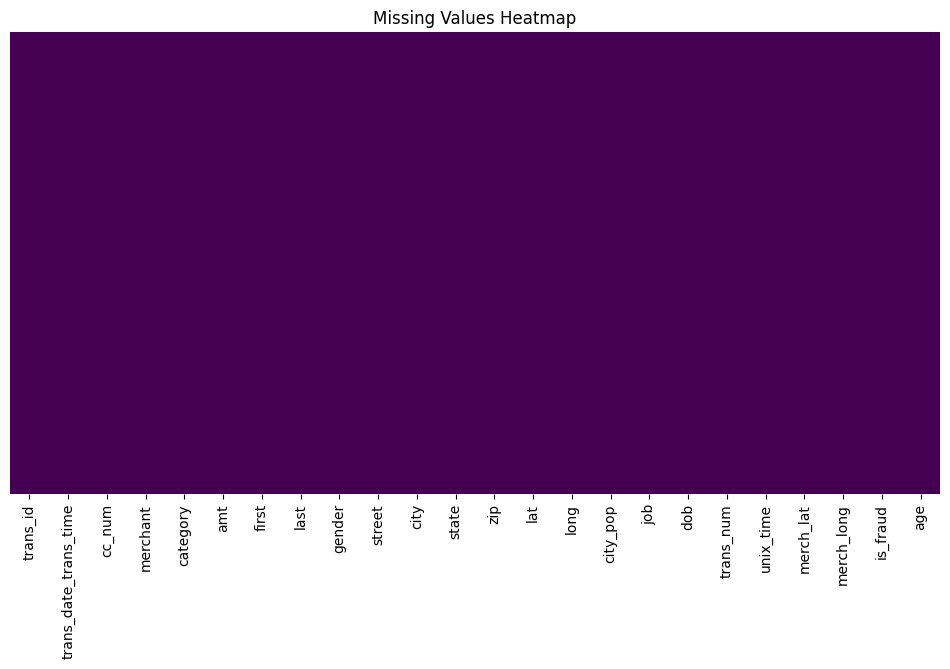

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [13]:
df.isnull().sum()

,0
trans_id,0
trans_date_trans_time,0
cc_num,0
merchant,9
category,6
amt,0
first,0
last,21
gender,0
street,14


In [16]:
import numpy as np
from sklearn.impute import KNNImputer

num_cols = df.select_dtypes(include=[np.number]).columns
print(df[num_cols].isnull().sum())

#imputer = KNNImputer(n_neighbors=5)
#df[num_cols] = imputer.fit_transform(df[num_cols])
#print("Missing values after KNN imputation (numerical):")
#print(df[num_cols].isnull().sum())
# For categorical columns, we can impute using the mode
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
  if df[col].isnull().sum() > 0:
    df[col] = df[col].fillna(df[col].mode()[0])

trans_id      0
cc_num        0
amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
age           0
dtype: int64
Missing values after KNN imputation (numerical):
trans_id      0
cc_num        0
amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
age           0
dtype: int64


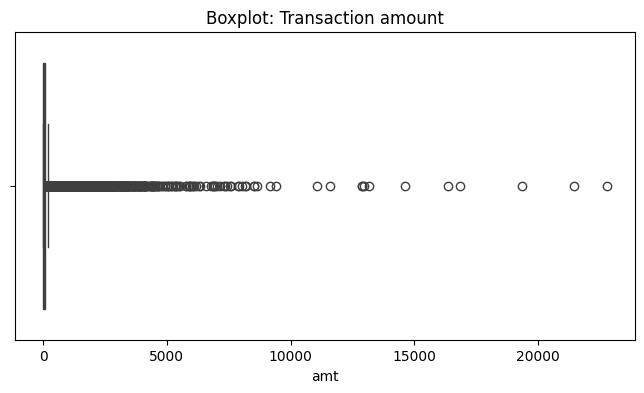

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x=df['amt'])
plt.title("Boxplot: Transaction amount")
plt.show()

In [21]:
from scipy.stats.mstats import winsorize

def winsorize_series(s, limits=[0.05, 0.05]):
    return winsorize(s, limits=limits)

# Apply winsorization on 'amt' column
df['amt_w'] = winsorize_series(df['amt'], limits=[0.05, 0.05])
df['amt'] = df['amt_w']  # Replace the original 'amt' column with the winsorized values
df.drop(columns=['amt_w'], inplace=True)  # Remove the temporary 'amt_w' column